# Data Explore of Titanic passengers


This document include four parts: 
1. **preparation:** to observe and clean up datas. 
2. **question:** to ask quetion, and suggest hypothesises
3. **analysis processing** 
4. **conclusion**

The results are all temporary, and maybe mistaken. Further improvments are needed.
 

## preparation

I am interested in data of Titanic passengers. I downloaded it and print the first few lines to take a quick look.

In [1]:
import pandas as pd
import numpy as np
titanic_data = pd.read_csv('titanic-data.csv')

In [2]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<img src="datanotes.png" alt="Drawing" style="width: 700px;"/>

I pasted the a note here to remind me the meaning of the datas. 

In the raw data，.The *Ages* column and the *Cabin* column contain lot of *NAN*, *Embarked* column also miss some data, so I check them.

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_data[titanic_data.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [5]:
titanic_data[titanic_data.Cabin.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [6]:
titanic_data[(titanic_data.Embarked != 'S') & (titanic_data.Embarked != 'C') & (titanic_data.Embarked != 'Q')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


I print all datas with *NAN*.  I check them in csv file and find that these datas were missing when I first got the datas.

I replace *NAN* in *Cabin* and *Embarked* column with '' in str form, uniforming the data type in order to processing the abnormal data. In *Cabin* column, there are too much missing data (about 3/4). I will not analysis base on this column.

I replace *NAN* in *Age* column with average age. Then it will not change the mean age of passengers, but the distribution of age will be slightly change. 

In [7]:
print(type(titanic_data['Age'][0]),type(titanic_data['Age'][5]))
print(type(titanic_data['Cabin'][0]),type(titanic_data['Cabin'][1]))


titanic_data['Cabin'] = titanic_data['Cabin'].fillna('')
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('')

temporate_memory = titanic_data['Age']
temporate_memory.fillna(0)
mean_age = temporate_memory.mean(axis='index')
print(mean_age)
titanic_data['Age'] = titanic_data['Age'].fillna(mean_age)

print(type(titanic_data['Cabin'][0]),type(titanic_data['Cabin'][1]))

<class 'numpy.float64'> <class 'numpy.float64'>
<class 'float'> <class 'str'>
29.69911764705882
<class 'str'> <class 'str'>


Now data is ready.

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Question

As many things interest me, I write some question down :
    
+ Which factors influence the survival?

   age: The under-aged and old passenger is more helpless. if they did not gain help from others, their death-rate must be high. 

   gender: It is said that when disaster occured, the gentle men on board gave up the seat in lifeboat to ladies and children. If it is true, the survival-rate is lower than women. 

   companions : Are passengers with children/parents tend to survive? Are passengers with sibling/spouse tend to survive?

   ticket-class: Are passengers in higher class tend to survive? 
   
   embarked station: I assume that embarked place do not influence the survival_rate, if it do, that is a weird thing which should be take a look.
   

+ About the consists of passengers.

   the proporation of population in each class
   
   the situation of the children with/without parents 
   
   the distribultion of passenger age/gender
   
   if the upper class have more families traval with them
   
   
+ About the ship
   
   the fare for each class 
   
   the passengers survive rate
   
   
I think I will explore them in reverse order, because the last one is the simplest and the first one is most complicated.


## Analysis Processing

### About the fare

First thing I am interested in is the fare for each class. I caculate the mean fare of each class, and maxmum fare of each class.

In [10]:
print("The mean fare of each class")
print(titanic_data.groupby(['Pclass'])['Fare'].mean())

The mean fare of each class
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [11]:
print("The most expensive ticket of each class")
print(titanic_data.groupby(['Pclass'])['Fare'].max(), titanic_data.groupby(['Pclass'])['Fare'].idxmax())
print(titanic_data.iloc[258], titanic_data.iloc[72], titanic_data.iloc[159])

The most expensive ticket of each class
Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64 Pclass
1    258
2     72
3    159
Name: Fare, dtype: int64
PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                          
Embarked                      C
Name: 258, dtype: object PassengerId                      73
Survived                          0
Pclass                            2
Name           Hood, Mr. Ambrose Jr
Sex                            male
Age                              21
SibSp                             0
Parch                             0
Ticket                 S.O.C. 14879
Fare                           73.5
Cabin                              
Embarked            

The mean fare of Upper class cabin is 84.154687,  and 20.662183 for Middle class cabin, 13.675550 for Lower class cabin.  

The fare for Upper class is 3.07 times more expensive than the Middle class, and 15.15 times more expensive than the Lower class. Nowadays, a plane from NewYork to London fare for first class is 5.4 times more expensive than tourist class.(take a sample in 2017.12.20 AmaricanAirLine AA6147)

The most expensive fare for Upper class cabin is 512.3292 , and 73.5000 for Middle class cabin, 69.5500 for Lower class. 

The most expensive ticket for Middle class cabin is even more expensive than mean fare of Upper class cabin. The passenger with the most expensive ticket is a lady named Ward, Miss. Anna. Looks like she was 35 and was not married, and did not traval with families. 

---
<font color=gray>**Actually I do not know indeed if the unit of fare is dollar. And another meaningless thing is that the fare there should  not be four  decimal. I guess the unit might be hundred dollars. And later I know the unit accroding to the webside (£512, 6s, 7d), but still can not recongnize it. </font> 

---



In [12]:
print("The cheapest ticket of each class")
print(titanic_data.groupby(['Pclass'])['Fare'].min(), titanic_data.groupby(['Pclass'])['Fare'].idxmin())
print(titanic_data.iloc[263], titanic_data.iloc[277], titanic_data.iloc[179])

The cheapest ticket of each class
Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64 Pclass
1    263
2    277
3    179
Name: Fare, dtype: int64
PassengerId                      264
Survived                           0
Pclass                             1
Name           Harrison, Mr. William
Sex                             male
Age                               40
SibSp                              0
Parch                              0
Ticket                        112059
Fare                               0
Cabin                            B94
Embarked                           S
Name: 263, dtype: object PassengerId                            278
Survived                                 0
Pclass                                   2
Name           Parkes, Mr. Francis "Frank"
Sex                                   male
Age                                29.6991
SibSp                                    0
Parch                                    0
Ticket                           

As for the cheapest ticket in each class, there is a strange thing. For all classes the cheapest ticket are all free (fare shows 0).

Is this situation a mistake? Or was there any passengers traval for free? 

I print passengers with 0 fare out, and find they all got on board on a embarkation pot named Southampton. I print the cheapest ticket of each embarkation pot as follow.

There was not passenger with 0 fare embarked on other two embarkation pots. Maybe there are some passengers from Southampton travelled for free. I am going to find them all out

In [13]:
print(titanic_data.groupby(['Embarked'])['Fare'].min())


Embarked
     80.0000
C     4.0125
Q     6.7500
S     0.0000
Name: Fare, dtype: float64


In [14]:
titanic_data[titanic_data.Fare == 0]    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,,S


As can be seen, all of them are male, younger than 50 and older than 19. They were all died in the disaster except one. The only survival is Mr. William Henry, 25 years old.
 
Some of they have tiket number. I don't why they did not pay for the ticket. Some of them have ticket number as *LINE*. and I print all passenger with  ticket number as *LINE*, these four passengers appear to be only ones. 

I do not know who they are, they may be stuffs on the boat, or may tried steal a ride. I search *Tornquist, Mr. William Henry* on google and find him in a webside [encyclopedia-titanica](www.encyclopedia-titanica.org). The document in the webside shows they are employees on another ship.

>He travelled as a third class passenger (ticket number 370160) together with fellow American Line employees: William Cahoone Johnson Jr., Alfred Johnson, Lionel Leonard, Alfred Carver and Thomas Storey.
When the Titanic he claimed there was no room for him in any lifeboat and that he had to be rescued on Collapsible A however, he was probably rescued in Lifeboat 15.

These names mentioned in the document are just the passengers with  ticket number as *LINE*.

What about other passengers with 0 fare? Search the oldest passenger's name *Johnson, Mr. Alfred* :

>Alfred was one of the nine-strong "guarantee group" of Harland and Wolff employees chosen to oversee the smooth running of the Titanic's maiden voyage. He, like the rest of his counterparts, died in the sinking. His body, if recovered, was never identified.

He was also an employee.  The others were more or less in same situation. There is a special one, Jonkheer John George, who is the designer of the ship.

They were men of great age, as stuff on Titanic, they stick to their duty and save as many as passengers. I am very impressed to find this.


In [15]:
titanic_data[titanic_data.Ticket == 'LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,,S


I remenber there was a lady Miss. Anna who pay the most expensive ticket. I also find her profile in the webside, and find out she is a entourage of the wealthy Cardeza family.

>Annie came into the employ of the wealthy Cardeza family as the personal maid to wealthy widow Charlotte Drake Cardeza. In late 1911/early 1912 she had accompanied her employer to Africa and Europe where they had joined Mrs Cardeza's son Thomas, the two of them being big-game hunters. For the return to the USA Annie boarded the Titanic at Cherbourg on 10 April 1912 with Mrs Cardeza, her son Thomas and his manservant Gustave Lesueur and the entourage travelled on ticket number 17755 which cost the princely sum of  £512, 6s, 7d.

therefore a ticket number can have more than one passenger. As followed, this expensive ticket is for 3 person. They are Mr. Thomas and his two entourages.

In [16]:
titanic_data[titanic_data.Ticket=='PC 17755']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### survival rate

Also the survival rate is important. Not only I caculate the survival rate of total population, I also caculate survival rate of each gender, each class, children, and old people.

The survival rate of men is really low, lower than total survival rate. As it is expected, the female survival rate is higher than total survival rate. Compared with total population, children are more likely to survive while older people are not.

I will take a deeper look later when I study factors influenceing the survival rate.

In [17]:
def caculate_survival_rate(data):
    population = data.count()['PassengerId']
    survival_population = data['Survived'].sum()
    victim_population = population - survival_population
    survival_rate = survival_population / population
    return survival_rate

print('total survival rate:',caculate_survival_rate(titanic_data))
print('male survival rate:',caculate_survival_rate(titanic_data[titanic_data.Sex=='male']))
print('female survival rate:',caculate_survival_rate(titanic_data[titanic_data.Sex=='female']))
print('chidren survival rate:',caculate_survival_rate(titanic_data[titanic_data.Age<=18]))
print('older than 60 survival rate:',caculate_survival_rate(titanic_data[titanic_data.Age>=60]))
print('older than 70 survival rate:',caculate_survival_rate(titanic_data[titanic_data.Age>=70]))
print('lowerclass survival rate:',caculate_survival_rate(titanic_data[titanic_data.Pclass==3]))
print('middleclass survival rate:',caculate_survival_rate(titanic_data[titanic_data.Pclass==2]))
print('upperclass survival rate:',caculate_survival_rate(titanic_data[titanic_data.Pclass==1]))

total survival rate: 0.383838383838
male survival rate: 0.188908145581
female survival rate: 0.742038216561
chidren survival rate: 0.503597122302
older than 60 survival rate: 0.269230769231
older than 70 survival rate: 0.142857142857
lowerclass survival rate: 0.242362525458
middleclass survival rate: 0.472826086957
upperclass survival rate: 0.62962962963


### Distribution of passengers

The size of the data is 891, in which there are 314 females and 577 males. 216 passengers in upper class, 184 in middle class and 491 in lower class.

In [18]:
print(len(titanic_data))
print(len(titanic_data[titanic_data.Sex=='female']))
print(len(titanic_data[titanic_data.Sex=='male']))
print(len(titanic_data[titanic_data.Pclass==1]))
print(len(titanic_data[titanic_data.Pclass==2]))
print(len(titanic_data[titanic_data.Pclass==3]))

891
314
577
216
184
491


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 


def consist(data, column_name):
    count_by_group = titanic_data.groupby(column_name).count()['PassengerId']
    proporation= count_by_group / count_by_group.sum()
    proporation.name = ''
    return proporation
    

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: , dtype: float64


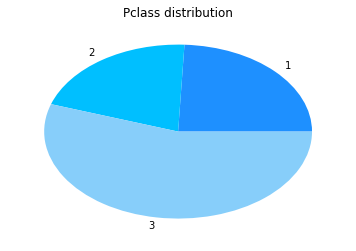

In [20]:
print(consist(titanic_data, 'Pclass'))
consist(titanic_data, 'Pclass').plot.pie(title='Pclass distribution', colors=[ '#1E90FF','#00BFFF',  '#87CEFA'])


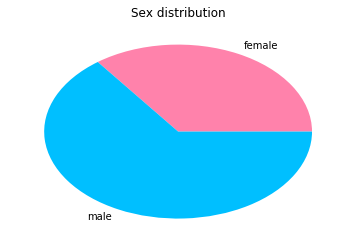

In [21]:
consist(titanic_data, 'Sex').plot.pie( title='Sex distribution', colors=[ '#FF82AB','#00BFFF'])

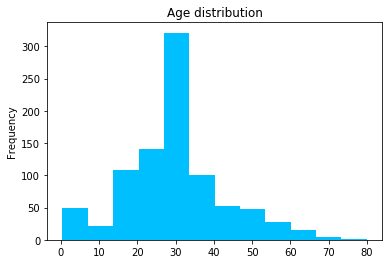

In [22]:
titanic_data['Age'].plot.hist(bins=12, title='Age distribution',color=['#00BFFF'])

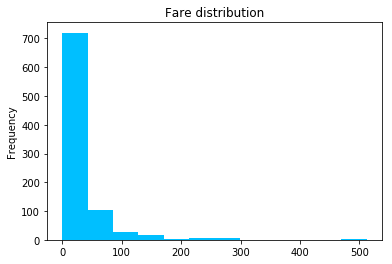

In [23]:
titanic_data['Fare'].plot.hist(bins=12, title='Fare distribution',color=['#00BFFF'])

I asked a question when i awared that one ticket is for more than one passenger. Did the upper class have more families traval with them? Now it seems not. On the contray, the lower class passenger are with more families.

In [24]:
per_class_parch_num = titanic_data.groupby('Pclass')["Parch"].sum()
per_class_sibsp_num = titanic_data.groupby('Pclass')["SibSp"].sum()
per_class_num = titanic_data.groupby('Pclass').count()['PassengerId']

parch_rate = per_class_parch_num/per_class_num
sibsp_rate = per_class_sibsp_num/per_class_num

print(per_class_parch_num/per_class_num, per_class_sibsp_num/per_class_num)


#parch_rate.plot.barh()

Pclass
1    0.356481
2    0.380435
3    0.393075
dtype: float64 Pclass
1    0.416667
2    0.402174
3    0.615071
dtype: float64


In [25]:
#sibsp_rate.plot.barh()

### factors influencing the survival


I have caculate the survival rate before, and in order to see it more clearly I plot it. 

+ The survival rate of men is really low, lower than total survival rate. As it is expected, the female survival rate is higher than total survival rate. 

+ Compared with total population, children are more likely to survive while older people are not.

+ Passengers in upper class are more likely to survive, and survival rate of passengers in middle class is still higher than total survival rate, but in lower class over 3/4 passengers died.

I am going to show these in seperate graphs. These graghs only show the survival rate of different groups, and we can only guess but not deduce the reason. 


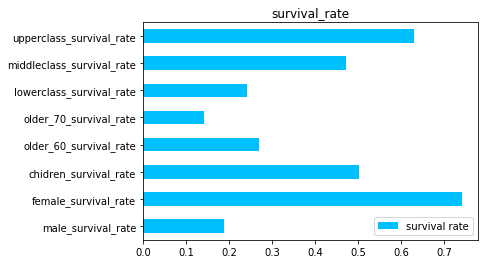

In [26]:

total_survival_rate = caculate_survival_rate(titanic_data)
male_survival_rate = caculate_survival_rate(titanic_data[titanic_data.Sex=='male'])
female_survival_rate = caculate_survival_rate(titanic_data[titanic_data.Sex=='female'])
chidren_survival_rate = caculate_survival_rate(titanic_data[titanic_data.Age<=18])
older_60_survival_rate = caculate_survival_rate(titanic_data[titanic_data.Age>=60])
older_70_survival_rate = caculate_survival_rate(titanic_data[titanic_data.Age>=70])
lowerclass_survival_rate = caculate_survival_rate(titanic_data[titanic_data.Pclass==3])
middleclass_survival_rate = caculate_survival_rate(titanic_data[titanic_data.Pclass==2])
upperclass_survival_rate = caculate_survival_rate(titanic_data[titanic_data.Pclass==1])

type (male_survival_rate)
                                       
survival_rate_data = [[male_survival_rate], 
        [female_survival_rate], 
        [chidren_survival_rate], 
        [older_60_survival_rate], 
        [older_70_survival_rate], 
        [lowerclass_survival_rate], 
        [middleclass_survival_rate], 
        [upperclass_survival_rate]]

survival_rate_index = ['male_survival_rate', 'female_survival_rate', 
         'chidren_survival_rate', 'older_60_survival_rate', 
         'older_70_survival_rate', 'lowerclass_survival_rate', 
         'middleclass_survival_rate', 'upperclass_survival_rate']


survival_rate = pd.DataFrame(data = survival_rate_data, index = survival_rate_index, columns = ['survival rate'])                          



survival_rate.plot.barh(title='survival_rate',color=['#00BFFF'])
                                       

**1. gender:**

It is clear that survival is related to gender. Survival of female is much higher than male. To take a closer look:

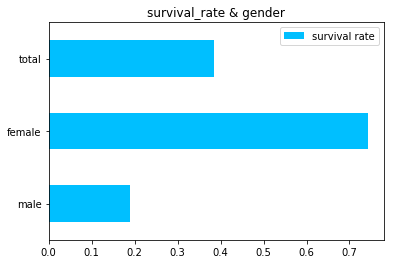

In [27]:
m_f_survival_rate = pd.DataFrame(data = [[male_survival_rate], 
                                    [female_survival_rate], 
                                    [total_survival_rate]
                                    ],
                                 index = ['male', 'female', 'total'],
                                 columns = ['survival rate']
)                          

m_f_survival_rate.plot.barh(title='survival_rate & gender',color=['#00BFFF',  '#87CEFA','#1E90FF'])
                                       

**2. class:**

Compared total survival rate and survival rate of each class, the survival rate of lower class is lower. And we can remember the lower class contain most passengers. If you remember the pie gragh *Pclass distribution*, you will know over half of total population travelled in lower class.

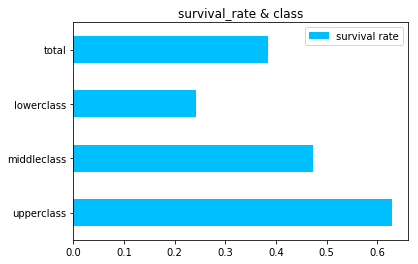

In [28]:
class_survival_rate = pd.DataFrame(data = [[upperclass_survival_rate], 
                                    [middleclass_survival_rate], 
                                    [lowerclass_survival_rate],
                                    [total_survival_rate]
                                    ],
                                 index = ['upperclass', 'middleclass','lowerclass', 'total'],
                                 columns = ['survival rate']                                
)                          

class_survival_rate.plot.barh(title='survival_rate & class',color=['#00BFFF','#87CEFA','#1E90FF'])
                                       

**3. age:**

It seems age would influence the survival. I am going to plot the servival rate of each age group. 

First I find out ages of the oldest and the youngest passenger. The youngest passenger is 0.42 year old, and the oldest passenger is 80. Grouping by each 10 years, I caculate the survival rate of each group.

In [29]:
print(titanic_data['Age'].min(),titanic_data['Age'].max())

0.42 80.0


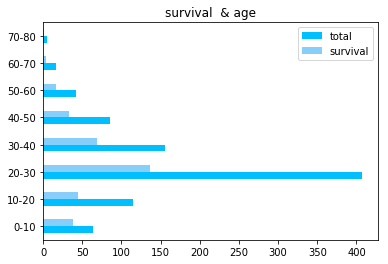

In [30]:
population_age = [[0]*8, [0]*8]



for i in titanic_data['PassengerId']:
    if titanic_data['Age'][i-1] <= 10: 
        population_age[0][0] += 1
        population_age[1][0] += titanic_data['Survived'][i-1]
    elif titanic_data['Age'][i-1] <= 20: 
        population_age[0][1] += 1
        population_age[1][1] += titanic_data['Survived'][i-1]
    elif titanic_data['Age'][i-1] <= 30: 
        population_age[0][2] += 1
        population_age[1][2] += titanic_data['Survived'][i-1]
    elif titanic_data['Age'][i-1] <= 40: 
        population_age[0][3] += 1
        population_age[1][3] += titanic_data['Survived'][i-1]
    elif titanic_data['Age'][i-1] <= 50: 
        population_age[0][4] += 1
        population_age[1][4] += titanic_data['Survived'][i-1]
    elif titanic_data['Age'][i-1] <= 60: 
        population_age[0][5] += 1
        population_age[1][5] += titanic_data['Survived'][i-1]
    elif titanic_data['Age'][i-1] <= 70: 
        population_age[0][6] += 1
        population_age[1][6] += titanic_data['Survived'][i-1]
    elif titanic_data['Age'][i-1] <= 80: 
        population_age[0][7] += 1
        population_age[1][7] += titanic_data['Survived'][i-1]

age_survival = pd.DataFrame(data = population_age, 
                                   index = ['total','survival'],
                                   columns = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
                                  )
age_survival = age_survival.T 
age_survivalrate = age_survival['survival'] / age_survival ['total']

age_survival.plot.barh(title='survival  & age',color=['#00BFFF',  '#87CEFA','#1E90FF'])


0-10     0.593750
10-20    0.382609
20-30    0.334152
30-40    0.445161
40-50    0.383721
50-60    0.404762
60-70    0.235294
70-80    0.200000
dtype: float64


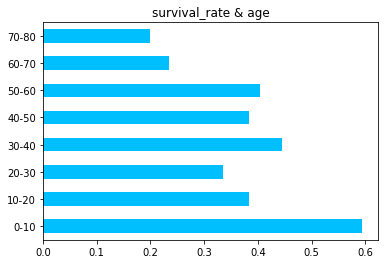

In [31]:
age_survivalrate.plot.barh(title='survival_rate & age',color=['#00BFFF'])                           
print(age_survivalrate)

According to above, I sujest when a passenger fullfill the conditions as follow, she is more likely to survive.

+ a child
+ a female
+ in upper class

In fact the only passenger in data who fullfill these conditions is Miss. Helen, a two year old girl, who did not survive.

In [32]:
female_data = titanic_data[titanic_data.Sex=='female']
female_upperclass_data = female_data[female_data.Pclass==1]
female_upperclass_age0_data = female_upperclass_data[female_upperclass_data.Age<=10]
female_upperclass_age0_survival_rate = caculate_survival_rate(female_upperclass_age0_data)
print( female_upperclass_age0_data)

     PassengerId  Survived  Pclass                          Name     Sex  Age  \
297          298         0       1  Allison, Miss. Helen Loraine  female  2.0   

     SibSp  Parch  Ticket    Fare    Cabin Embarked  
297      1      2  113781  151.55  C22 C26        S  


However, the pobability to survive is really high if you are a female in first class.

In [33]:
female_data = titanic_data[titanic_data.Sex=='female']
female_upperclass_data = female_data[female_data.Pclass==1]
female_upperclass_survival_rate = caculate_survival_rate(female_upperclass_data)
print( female_upperclass_survival_rate)

0.968085106383


Therefore here is a thing i have to mention:

Although gender, age, class are probably factors influencing the survival, the result would be different in different condiction. For example, if we consider the group of children under 10, the gender factor will not influence the survival.


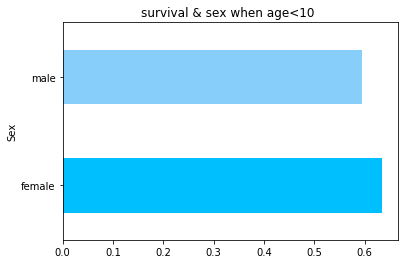

In [34]:
children_data = titanic_data[titanic_data.Age < 10]
children_sex_number = children_data.groupby('Sex').count()['PassengerId']
children_sex_servival = children_data.groupby('Sex').sum()['Survived']
children_sex_servival_rate = children_sex_servival / children_sex_number

children_sex_servival_rate.plot.barh(title='survival & sex when age<10 ',color=['#00BFFF',  '#87CEFA','#1E90FF'])


And I take a look at other few cross-condition datas (passengers full fill more than one condictions):

Females in lower class had a survival as 50%, much lower than upper class females, and males in lowerclass were even with bigger sacrify. However, the survival rate of male in upper class is 36.9%, which is lower than the total survival rate.

In [35]:
female_data = titanic_data[titanic_data.Sex=='female']
female_lowerclass_data = female_data[female_data.Pclass==3]
female_lowerclass_survival_rate = caculate_survival_rate(female_lowerclass_data)
print( female_lowerclass_survival_rate)

0.5


In [36]:
male_data = titanic_data[titanic_data.Sex=='male']
male_upperclass_data = male_data[male_data.Pclass==1]
male_upperclass_survival_rate = caculate_survival_rate(male_upperclass_data)
print( male_upperclass_survival_rate)

0.368852459016


In [37]:
male_data = titanic_data[titanic_data.Sex=='male']
male_lowerclass_data = male_data[male_data.Pclass==3]
male_lowerclass_survival_rate = caculate_survival_rate(male_lowerclass_data)
print( male_lowerclass_survival_rate)

0.135446685879


## Conclusion

The size of the data is 891, in which there are 314 females and 577 males. 216 passengers in upper class, 184 in middle class and 491 in lower class. These data is not include all passengers on titanic, but a sample (sample size: 891). The total population on titanic is 2207.

#### Source of error

1. In consider of the sample size, the sample can represent the whole population. However, we do not know the sample is picked by radom or in some condictions. These might be the source of error.

2. In the raw data，.The *Ages* column and the *Cabin* column contain lot of *NAN*, *Embarked* column also miss some data. I filled them, but cause the error in age distribution and the statistics of survival rate due to age.

3. This is technically not a source of error, but in order to prevent misunderstandings，the these factors are not independent.

#### Distribution of passengers

The distribution of passengers is as follow.


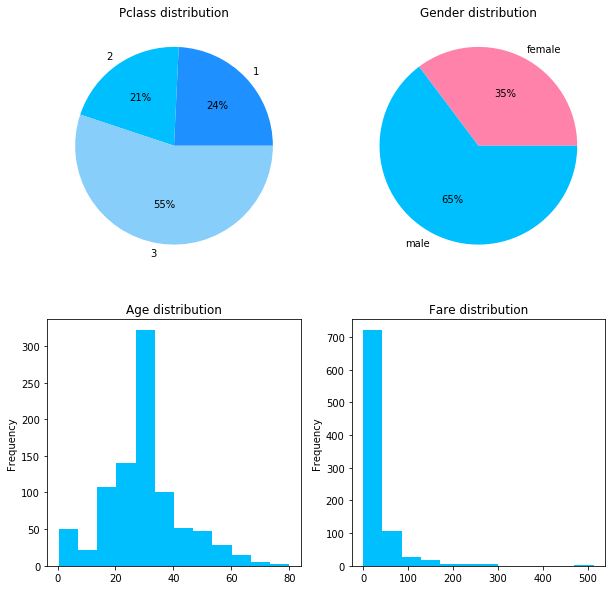

In [38]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize= (10, 10))

the_grid = GridSpec(2,2)

plt.subplot(the_grid[0,0], aspect=1)
consist(titanic_data, 'Pclass').plot.pie(title='Pclass distribution', autopct='%.0f%%', colors=[ '#1E90FF','#00BFFF',  '#87CEFA'])
plt.subplot(the_grid[0,1], aspect=1)
consist(titanic_data, 'Sex').plot.pie(autopct='%.0f%%', title='Gender distribution', colors=[ '#FF82AB','#00BFFF'])
plt.subplot(the_grid[1,0])
titanic_data['Age'].plot.hist(bins=12, title='Age distribution',color=['#00BFFF'])
plt.subplot(the_grid[1,1])
titanic_data['Fare'].plot.hist(bins=12, title='Fare distribution',color=['#00BFFF'])


#### factors influencing the survival


The conclusion of factors influencing the survival is as below. 

+ **Female is more likely to survive:** The survival rate of men is really low, lower than total survival rate. As it is expected, the female survival rate is higher than total survival rate. 

+ **As age get older, likelyhood to survive decrease:** Compared with total population, children are more likely to survive while older people are not. I replaced *NAN* in *Age* column with average age(29), so about 180 passengers are recongnaized as 20-30 years old. This can lead to a diviation.

+ **Lower the class, less likely to survive:** Passengers in upper class are more likely to survive, and survival rate of passengers in middle class is still higher than total survival rate, but in lower class over 3/4 passengers died.

There might be other factors influencing the survival, for example, companion, personal health condiction, and position... 

I am going to show these in seperate graphs. 


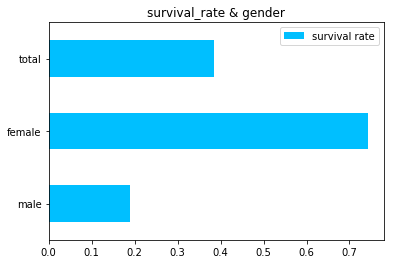

In [39]:
m_f_survival_rate.plot.barh(title='survival_rate & gender',color=['#00BFFF',  '#87CEFA','#1E90FF'])

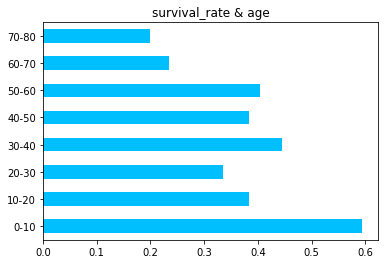

In [40]:
age_survivalrate.plot.barh(title='survival_rate & age',color=['#00BFFF'])  


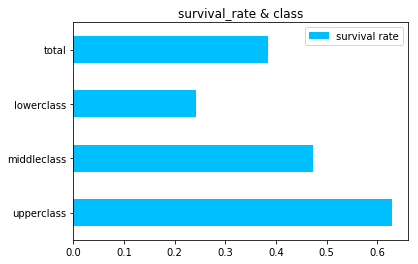

In [41]:
class_survival_rate.plot.barh(title='survival_rate & class',color=['#00BFFF',  '#87CEFA','#1E90FF'])
                                       
                

According to above, I sujest following factor can increase the probability to survive: 

+ being a child
+ being a female
+ being in upper class

Here is a thing I have to mention:

Although gender, age, class are probably factors influencing the survival, the result would be different in different condiction. In a few words, these factors are not independent.

For example, if we consider the group of children under 10, the gender factor will not influence the survival. 

And things happens always by chance.

As result, although it seems when a passenger fullfill some conditions(a child, a female, in upper class) she is more likely to survive, in fact the only passenger in data who fullfill these conditions is Miss. Helen, a two year old girl, who did not survive.

